In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

DIPlib -- a quantitative image analysis library
Version 3.5.2 (Dec 27 2024)
For more information see https://diplib.org


# Part 3.3

Original image:
2D Scalar image:
    data type:      SFLOAT
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   0x5b77842dbc20 (shared among 1 images)
    origin pointer: 0x5b77842dbc20



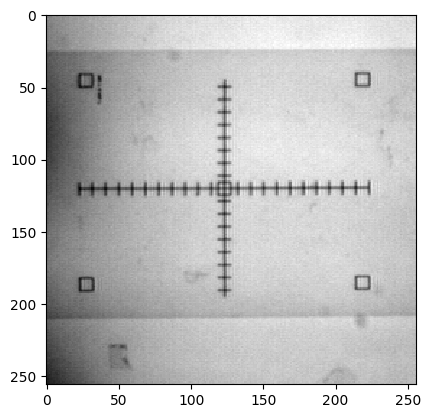

Estimated background illumination:


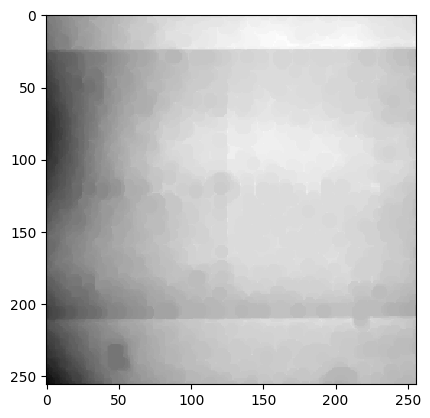

Subtract background illumination from original (Black-Hat transformation)


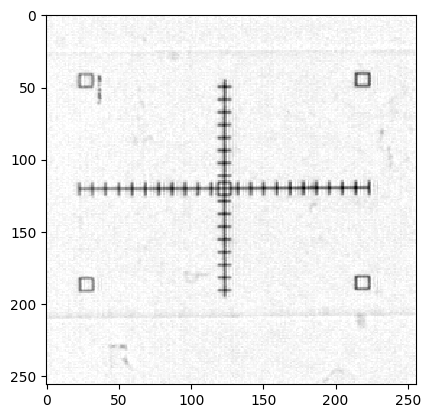

Segmentation on the cleaned image:


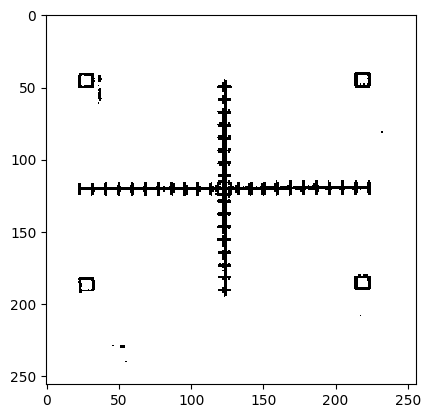

Closing using horizontal line SE:


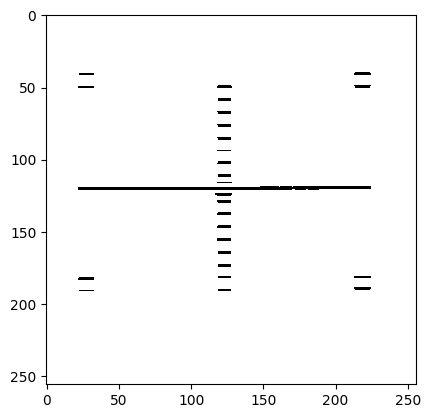

Peak positions when integrating over image rows:


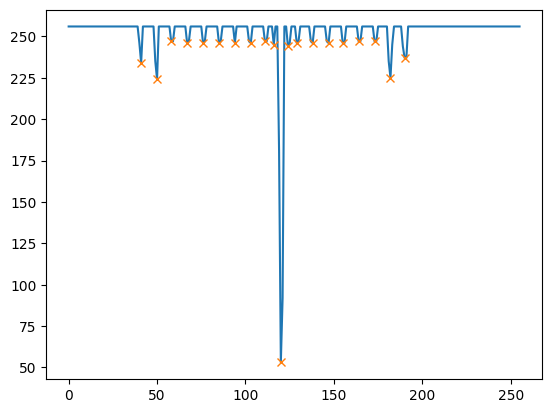

Distance between peaks: [9 8 9 9 9 9 9 8 5 4 4 5 9 9 8 9 9 9 8]
Removing outliers: [9 8 9 9 9 9 9 8 9 9 8 9 9 9 8]
Mean peak distance: 8.733333333333333
Units-per pixel size: 0.11450381679389314


In [279]:
# 7

# Load original image
image = dip.ImageRead("2025Assignment03Images/scale-img.ics")
print("Original image:")
print(image)
image.Show()

# Apply cosing with large SE to estimate background illumination
se = dip.SE(10, "elliptic")
image_bg = dip.Closing(image, se)
print("Estimated background illumination:")
image_bg.Show()

# Subtract background illumination from originali image (moving the values back to positive integers)
# aka Black-Hat transformation
image_clean = image - image_bg
image_clean -= dip.Minimum(image_clean)
print("Subtract background illumination from original (Black-Hat transformation)")
image_clean.Show()

# 8

# Apply segmentation on the cleaned image
image_seg = dip.IsodataThreshold(image_clean)
print("Segmentation on the cleaned image:")
image_seg.Show()

# Perform closing using a horizontal line SE to remove vertical lines
horizontal_se = dip.SE((8,1), "rectangular")
image_horizontal = dip.Closing(image_seg, horizontal_se)
print("Closing using horizontal line SE:")
image_horizontal.Show()

# Integrate over the rows
np_horizontal = np.array(image_horizontal)
np_horizontal_count = np_horizontal.sum(axis=1)
plt.plot(np_horizontal_count)

# Find the minima over the rows to detect line position
peaks, _ = find_peaks(-np_horizontal_count)
plt.plot(peaks, np_horizontal_count[peaks], 'x')

print("Peak positions when integrating over image rows:")
plt.show()

# Calculate distance between peaks
peak_distance = peaks[1:] - peaks[:-1]
print(f"Distance between peaks: {peak_distance}")

def reject_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# Remove outliers in peak distances
filtered_peak_distance = reject_outliers(peak_distance)
print(f"Removing outliers: {filtered_peak_distance}")

# Calculate mean peak distance
mean_peak_distance = filtered_peak_distance.mean()
print(f"Mean peak distance: {mean_peak_distance}")

# Calculate units-per pixel size
units_per_pixel = 1 / mean_peak_distance
print(f"Units-per pixel size: {units_per_pixel}")


# 3.4

Original image:
2D Color image (3x1 column vector, 3 elements, sRGB):
    data type:      UINT8
    sizes:          {1292, 968}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {3, 3876}, tensor stride 1
    data pointer:   0x5ab7b3bc2b00 (shared among 1 images)
    origin pointer: 0x5ab7b3bc2b00



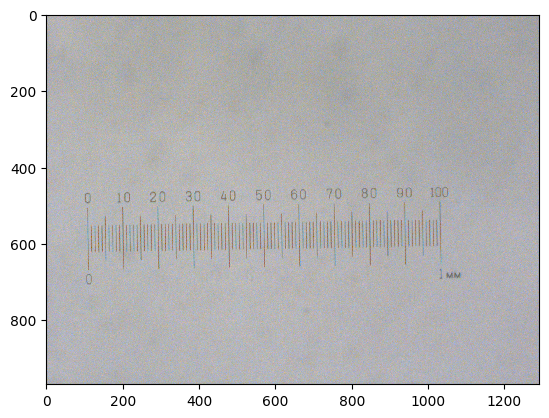

Converted to grayscale:
2D Scalar image:
    data type:      SFLOAT
    sizes:          {1292, 968}
    pixel size:     0.169333 mm x 0.169333 mm
    strides:        {1, 1292}, tensor stride 1
    data pointer:   0x5ab7b6e176c0 (shared among 1 images)
    origin pointer: 0x5ab7b6e176c0



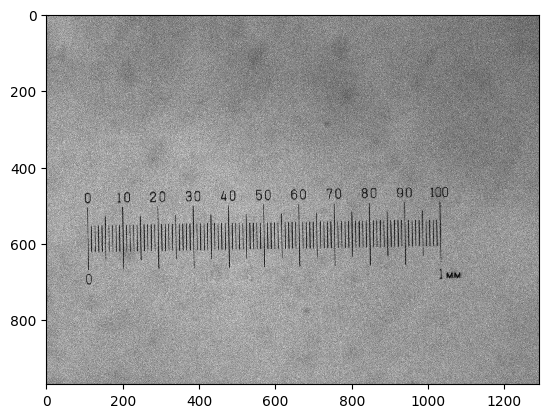

Estimated background illumination:


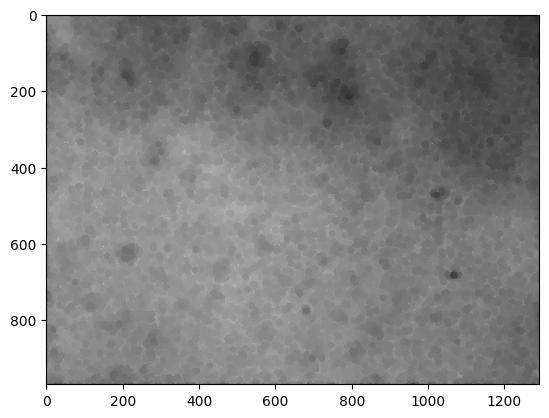

Subtract background illumination from original (Black-Hat transformation)


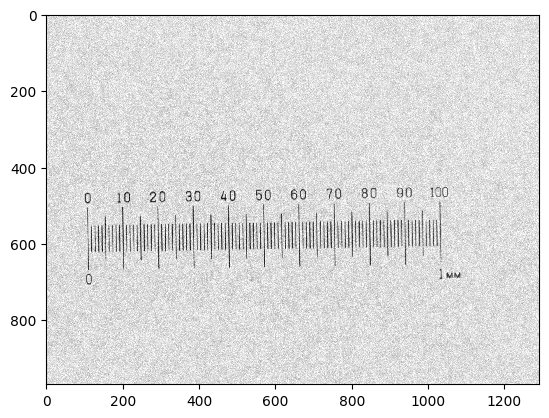

Segmentation on the cleaned image:


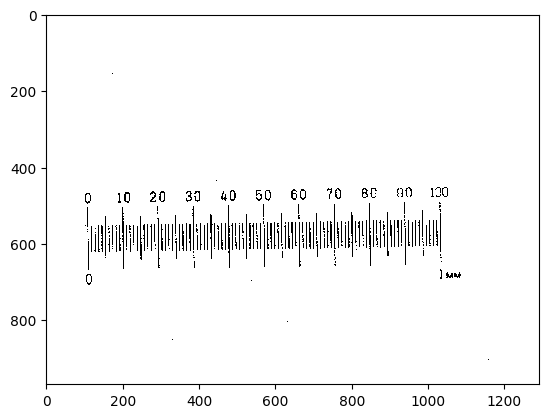

Rotate image to align reticle:


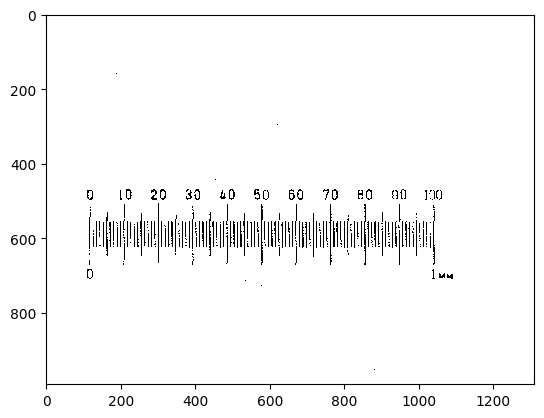

Closing using vertical line SE:


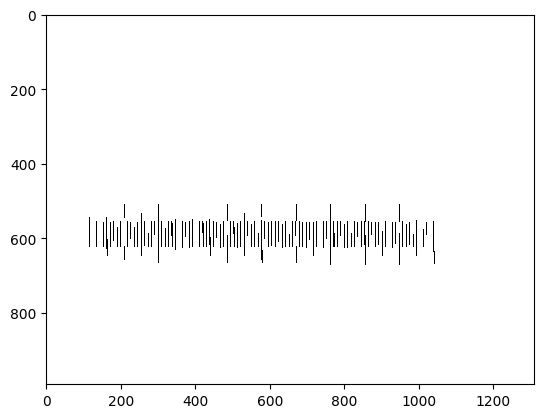

Peak positions when integrating over image columns:


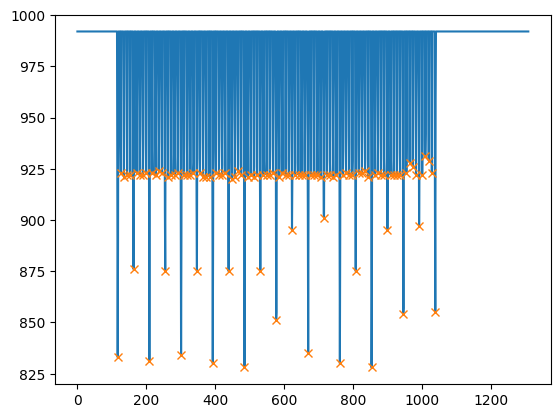

Distance between peaks: [ 9  9  9  9 10  9  9  9  9 10  9  9  9  9 10  9  9  9  9 10  9  9  9  9
 10  9  9  9 10  9  9  9  9  9 10  9  9  9  9 10  9  9  9  9 10  9  9 10
  9  9  9  9 10  9  9  9 10  9  9 10  9  9  9  9 10  8 10  9  9 10  9  9
  9  9 10  9  9  9 10  9  9  9  9 10  9  9  9 10  9  9  9 10  9  9  9  9
  9 10  9 10]
Removing outliers: [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9]
Mean peak distance: 9.0
Units-per pixel size: 0.1111111111111111


In [53]:
# 9

# Load original image
image = dip.ImageRead("2025Assignment03Images/CamIm04.tif")
print("Original image:")
print(image)
image.Show()

# Convert to greyscale
gray_image = dip.ColorSpaceManager.Convert(image, "gray")
print("Converted to grayscale:")
print(gray_image)
gray_image.Show()

image = gray_image

# Apply cosing with large SE to estimate background illumination
se = dip.SE(15, "elliptic")
image_bg = dip.Closing(image, se)
print("Estimated background illumination:")
image_bg.Show()

# Subtract background illumination from originali image (moving the values back to positive integers)
# aka Black-Hat transformation
image_clean = image - image_bg
image_clean -= dip.Minimum(image_clean)
print("Subtract background illumination from original (Black-Hat transformation)")
image_clean.Show()

# 10

# Apply segmentation on the cleaned image
image_seg = dip.IsodataThreshold(image_clean)
print("Segmentation on the cleaned image:")
image_seg.Show()

# Rotate image to align reticule
rot_deg = 1
image_rot = dip.Rotation2D(image_seg, angle=np.deg2rad(rot_deg))
print("Rotate image to align reticle:")
image_rot.Show()

# Perform closing using a vertical line SE to remove vertical lines
vertical_se = dip.SE((1,32), "rectangular")
image_vertical = dip.Closing(image_rot, vertical_se)
print("Closing using vertical line SE:")
image_vertical.Show()

# Integrate over the rows
np_vertical = np.array(image_vertical)
np_vertical_count = np_vertical.sum(axis=0)
plt.plot(np_vertical_count)

# Find the minima over the columns to detect line position
peaks, _ = find_peaks(-np_vertical_count)
plt.plot(peaks, np_vertical_count[peaks], 'x')

print("Peak positions when integrating over image columns:")
plt.show()

# Calculate distance between peaks
peak_distance = peaks[1:] - peaks[:-1]
print(f"Distance between peaks: {peak_distance}")

def reject_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# Remove outliers in peak distances
filtered_peak_distance = reject_outliers(peak_distance)
print(f"Removing outliers: {filtered_peak_distance}")

# Calculate mean peak distance
mean_peak_distance = filtered_peak_distance.mean()
print(f"Mean peak distance: {mean_peak_distance}")

# Calculate units-per pixel size
units_per_pixel = 1 / mean_peak_distance
print(f"Units-per pixel size: {units_per_pixel}")
